In [ ]:
import pandas as pd

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.05968, score: 0.54209
[fold 1] alpha: 0.04520, score: 0.15523
[fold 2] alpha: 0.07880, score: 0.45193

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


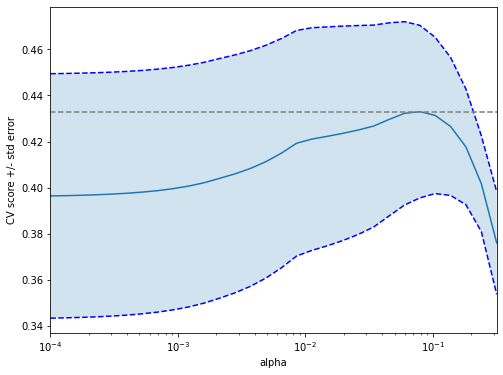

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

# #############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
k_fold = KFold(3)

print("Answer to the bonus question:", "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print(
        "[fold {0}] alpha: {1:.5f}, score: {2:.5f}".format(
            k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])
        )
    )
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

X, y = datasets.load_diabetes(return_X_y=True)

# Set the parameters by cross-validation
tuned_parameters = [
   {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}
]

svr = SVR()
clf = GridSearchCV(svr, tuned_parameters, refit=True)
clf.fit(X, y)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

print(clf.best_params_)



{'C': 10, 'coef0': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}


In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

X, y = datasets.load_breast_cancer(return_X_y=True)

model = {'model': RandomForestClassifier(),
         'parameters':  {
            'rf__n_estimators' : np.arange(20,200,20),
            'rf__criterion': ['gini', 'entropy'],
            'rf__max_depth' : np.arange(5,50,5),
            'rf__min_samples_split' : [2,4,6],
            'rf__min_samples_leaf' : [1,3,5],
            'rf__bootstrap':[True, False]       
            }}
pipeline = Pipeline(steps=[('rf', model['model'])])
cv_model = GridSearchCV(pipeline, param_grid=model['parameters'], refit=True, cv = 5, verbose=2)

cv_model.fit(X, y)
scores = cv_model.cv_results_["mean_test_score"]
scores_std = cv_model.cv_results_["std_test_score"]

print(cv_model.best_params_)



Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
[CV] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=20; total time=   0.0s
[CV] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=20; total time=   0.0s
[CV] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=20; total time=   0.0s
[CV] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=20; total time=   0.0s
[CV] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=20; total time=   0.0s
[CV] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=40; total time=   0.0s
[CV]

In [15]:
rf_best_params = {'rf__bootstrap': False, 'rf__criterion': 'entropy', 'rf__max_depth': 25, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 6, 'rf__n_estimators': 20}

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = datasets.load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rfc = RandomForestClassifier(
    criterion='entropy',
    bootstrap=False,
    min_samples_split=6,
    min_samples_leaf=1,
    n_estimators=20,
    max_depth=25
)

rfc.fit(x_train, y_train)
pred=rfc.predict(x_test)

print(f'Accruacy {accuracy_score(y_test, pred)}')

Accruacy 0.9766081871345029


In [54]:
scores = rfc.predict_proba(x_test)


In [60]:
pred_probs = []
pred_probs.append(scores)
pred_probs.append(scores)
sum(pred_probs)

array([[0.1       , 1.9       ],
       [2.        , 0.        ],
       [2.        , 0.        ],
       [0.        , 2.        ],
       [0.        , 2.        ],
       [2.        , 0.        ],
       [2.        , 0.        ],
       [2.        , 0.        ],
       [1.58333333, 0.41666667],
       [0.        , 2.        ],
       [0.09      , 1.91      ],
       [2.        , 0.        ],
       [0.08      , 1.92      ],
       [1.725     , 0.275     ],
       [0.        , 2.        ],
       [1.975     , 0.025     ],
       [0.        , 2.        ],
       [0.        , 2.        ],
       [0.        , 2.        ],
       [2.        , 0.        ],
       [0.425     , 1.575     ],
       [0.        , 2.        ],
       [2.        , 0.        ],
       [0.        , 2.        ],
       [0.        , 2.        ],
       [0.        , 2.        ],
       [0.        , 2.        ],
       [0.        , 2.        ],
       [0.        , 2.        ],
       [2.        , 0.        ],
       [0.

In [58]:
np.argmax(scores, axis=1)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [45]:
test_y = [[0,1,0,1],[1,0,1,0],[1,1,0,0],[0,0,1,1]]

In [46]:
[np.concatenate(labels) for labels in test_y]

ValueError: zero-dimensional arrays cannot be concatenated

In [ ]:
from sklearn.datasets import make_moons, make_classification, make_circles, make_blobs
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
from itertools import cycle, islice
import matplotlib
import warnings
from matplotlib.ticker import MaxNLocator
warnings.filterwarnings("ignore")
matplotlib.rcParams.update({'font.size': 20})
###toy 2
np.random.seed(4) 
X,y = make_blobs(n_samples=400, centers=2, cluster_std=0.7)
X[:,0] -= 9.3
X[:,1] -= 2.5

np.random.seed(1)
pos_ids = np.where(y == 0)[0]
neg_ids = np.where(y == 1)[0]
ids1 = np.random.randint(0,len(pos_ids),5)
ids2 = np.random.randint(0,len(neg_ids),5)
p1 = pos_ids[ids1]
p2 = neg_ids[ids2]

## generate labeled and unlabeled data
l_ids = np.concatenate((p1 , p2))
u_ids = np.array(list(set(np.arange(X.shape[0])) - set(l_ids)))
l_data1, l_data2 = X[l_ids,0].reshape(-1,1), X[l_ids,1].reshape(-1,1)
u_data1, u_data2 = X[u_ids,0].reshape(-1,1), X[u_ids,1].reshape(-1,1)
labels = y[l_ids]
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y) + 3))))
fig = plt.figure(figsize=(4,4))
x = [-1.5,0,1.5]
my_xticks=[-2,0,2]
plt.xticks(x, my_xticks)
plt.scatter(X[:,0], X[:,1], marker='o', c=colors[y], s=5)
plt.scatter(X[p1,0], X[p1,1], marker='^', c='#0F0F0F', s=100)
plt.scatter(X[p2,0], X[p2,1], marker='*', c='#0F0F0F', s=100)
plt.show()

import copy
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC,SVC, NuSVC
from copy import deepcopy

def sel_ids_y(score, add_num = 10):
    ids_sort = np.argsort(score)
    add_id = np.zeros(score.shape[0])
    add_id[ids_sort[:add_num]] = -1
    add_id[ids_sort[-add_num:]] = 1
    return add_id
    
def update_train_untrain(sel_ids, train_data, train_labels, untrain_data, weights=None):
#     sel_ids = np.array(sel_ids, dtype='bool')
    add_ids = np.where(np.array(sel_ids) != 0)[0]
    untrain_ids = np.where(np.array(sel_ids) == 0)[0]
    add_datas = [d[add_ids] for d in untrain_data]
    new_train_data = [np.concatenate([d1, d2]) for d1,d2 in zip(train_data, add_datas)]
    add_y = [1 if sel_ids[idx] > 0 else 0 for idx in add_ids]
    new_train_y = np.concatenate([train_labels, add_y])
    new_untrain_data = [d[untrain_ids] for d in untrain_data]
    return new_train_data, new_train_y, new_untrain_data


def cotrain(labeled_data, labels, unlabeled_data, iter_step=1):
    lbls = copy.deepcopy(labels)
    for step in range(iter_step):
        scores = []
        add_ids = []
        add_ys = []
        clfs = []
        for view in range(2):
            clfs.append(LinearSVC())
            clfs[view].fit(labeled_data[view], lbls)
            scores.append(clfs[view].decision_function(unlabeled_data[view]))
            add_id = sel_ids_y(scores[view], 6)
            add_ids.append(add_id)
        add_id = sum(add_ids)
        labeled_data, lbls, unlabeled_data = update_train_untrain(add_id, labeled_data, lbls, unlabeled_data)
        if len(unlabeled_data[view]) <= 0:
            break
    return clfs
        


def update_train(sel_ids, train_data, train_labels, untrain_data, pred_y):
    add_ids = np.where(np.array(sel_ids) != 0)[0]
    add_data = [d[add_ids] for d in untrain_data]
    new_train_data = [np.concatenate([d1, d2]) for d1,d2 in zip(train_data, add_data)]
    add_y = pred_y[add_ids]
    new_train_y = np.concatenate([train_labels, pred_y[add_ids]])
    return new_train_data, new_train_y


def spaco(clf, l_data, lbls, u_data, num_view, iter_step = 1, gamma = 0.5):
    
    # initiate classifier
    clfs = []
    scores = []
    add_ids = []
    add_num = 6
    clfss = []
    for view in range(num_view):
        clfs.append(clf)
        clfs[view].fit(l_data[view], lbls)
        scores.append(clfs[view].decision_function(u_data[view]))
        add_ids.append(sel_ids_y(scores[view], add_num))
        py = [0  if s < 0 else 1 for s in scores[view]]
    score = sum(scores)
    pred_y = np.array([0  if s < 0 else 1 for s in score])
    for step in range(iter_step):
        for view in range(2):
            if add_num * 2 > u_data[0].shape[0]: break
            #update v
            ov = np.where(add_ids[1-view] != 0)[0]
            scores[view][ov] += add_ids[1-view][ov] * gamma
            add_ids[view] = sel_ids_y(scores[view], add_num)
            
            
            #update w
            nl_data, nlbls = update_train(add_ids[view], l_data, lbls, u_data, pred_y)
            clfs[view].fit(nl_data[view], nlbls)
            
            # update y, v
            scores[view] = clfs[view].decision_function(u_data[view])
            add_num += 6
            scores[view][ov] += add_ids[1-view][ov] * gamma
            add_ids[view] = sel_ids_y(scores[view], add_num)
            
            
            score = sum(scores)
            
            pred_y = np.array([0  if s < 0 else 1 for s in score])
            py = [0  if s < 0 else 1 for s in scores[view]]
    return clfs
x = [-1.5,0,1.5]
my_xticks=[-2,0,2]

### parameters
steps = 16
gamma = 3
  
    



In [ ]:
### parameters
steps = 16
gamma = 3

#### spaco experiment1 gamma=3
clfs = spaco([l_data1, l_data2], labels, [u_data1, u_data2], iter_step=steps, gamma=3)
score1 = clfs[0].decision_function(X[:,0].reshape(-1,1))
score2 = clfs[1].decision_function(X[:,1].reshape(-1,1))
score = score1 + score2